In [1]:
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

import seaborn as sb

import math

#there is currently a bug in panda's scatter_matrix that produces a warning that has no affect on what I'm doin :)
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load in the data and make sure it's correct
df = pd.read_csv('./housing.csv', header=None, delim_whitespace=True, 
                 names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
display(df.head())
display(df.info())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

In [3]:
#clean data
dep_var = 'MEDV'
display(df.isnull().sum()) #no null values, yay!
display(df.head())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
#standardize data
df = (df - df.mean()) / df.std()
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


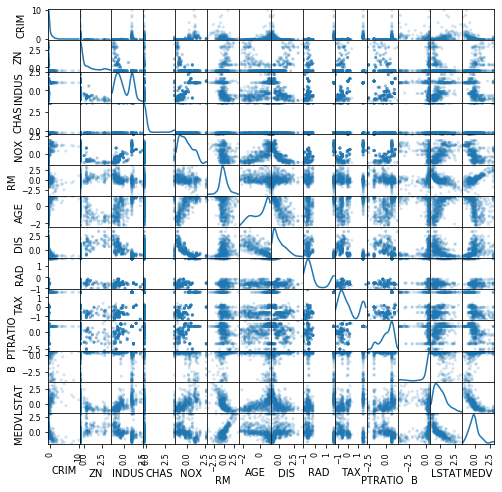

In [5]:
#scatterplot matrix
scatter_matrix(df, alpha=.2, figsize=(8,8), diagonal='kde')
plt.show()

In [6]:
#correlation matrix
corr_matrix = df.corr()
display(corr_matrix)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


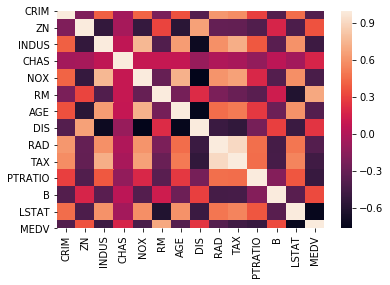

In [7]:
#heatmap
heatmap = sb.heatmap(corr_matrix)
plt.show()

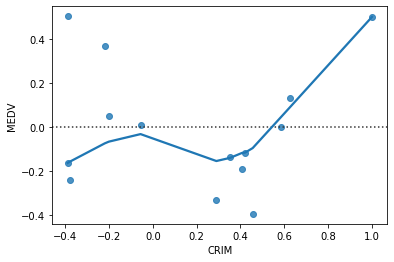

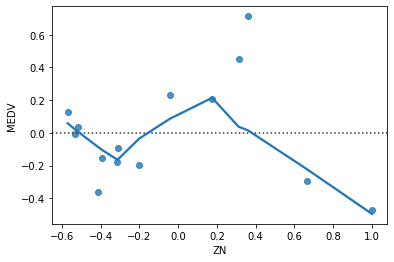

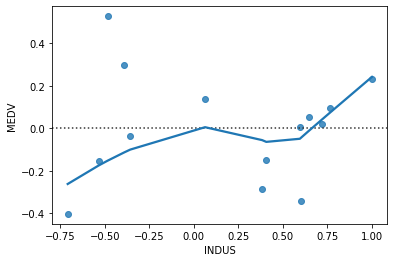

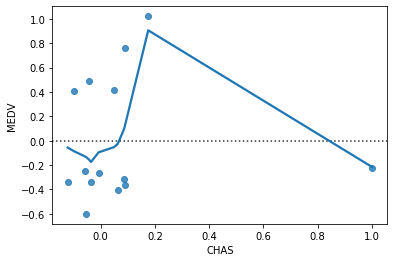

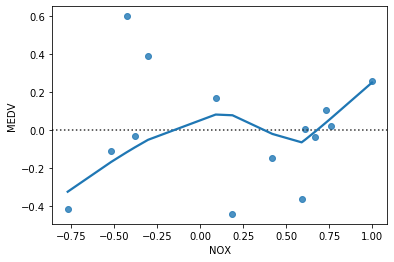

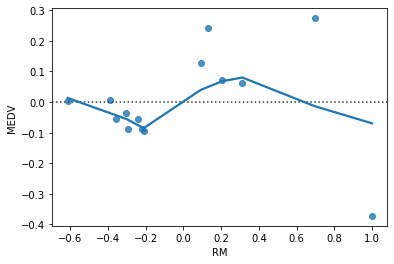

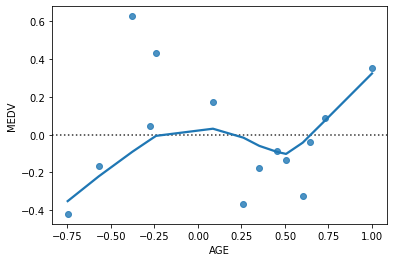

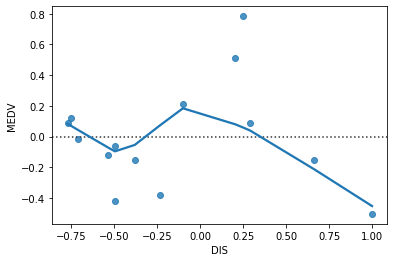

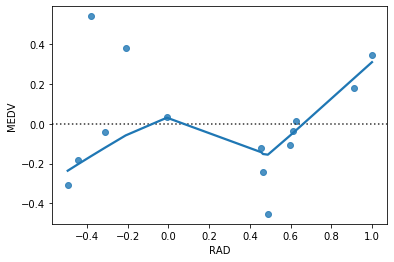

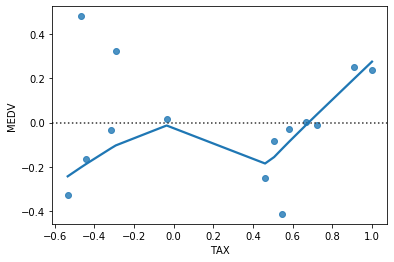

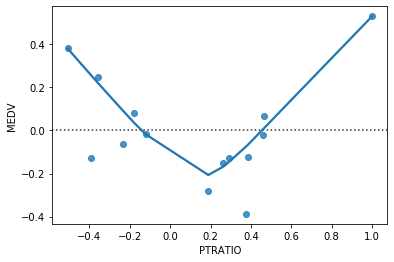

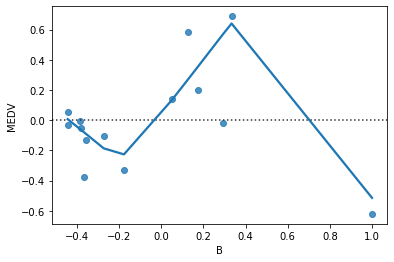

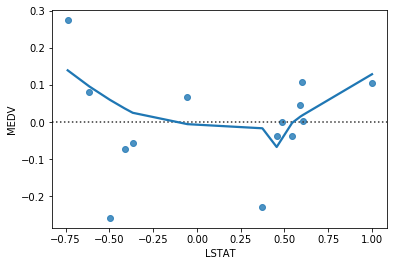

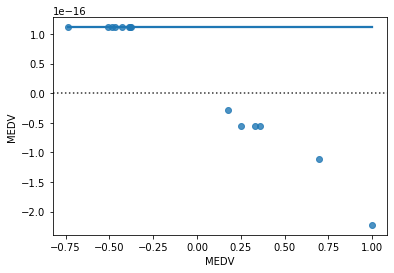

CRIM       None
ZN         None
INDUS      None
CHAS       None
NOX        None
RM         None
AGE        None
DIS        None
RAD        None
TAX        None
PTRATIO    None
B          None
LSTAT      None
MEDV       None
dtype: object

In [8]:
#residual plot
def res_plot(x_):
    y_ = dep_var
    sb.residplot(x=x_,y=y_, data=corr_matrix, lowess=True)
    plt.show()
    
corr_matrix.apply(res_plot)

In [9]:
#independent vars based on heatmap correlation to MEDV
ind_var_count = 3
ind_var_1 = 'LSTAT'
ind_var_2 = 'RM'
ind_var_3 = 'PTRATIO'

In [10]:
#split the data: 75% train, 25% test
shuffled_df = df[[ind_var_1, ind_var_2, ind_var_3, dep_var]].sample(frac=1)
train_size = int(0.75 * len(shuffled_df))

train_df = shuffled_df[:train_size]
test_df = shuffled_df[train_size:]

display(train_df.head())
display(test_df.head())
display(train_df.info())
display(test_df.info())

,LSTAT,RM,PTRATIO,MEDV
197,-0.566171,1.170432,-2.704703,0.844526
429,1.600173,0.135729,0.805778,-1.417055
116,-0.085850,-0.154614,-0.302794,-0.144916
406,1.496547,-3.055198,0.805778,-1.156104
465,0.206823,-0.748109,0.805778,-0.286265


,LSTAT,RM,PTRATIO,MEDV
243,-1.045092,0.154231,-0.857081,0.126909
314,-0.472348,0.401877,-0.025651,0.137782
301,-0.441540,0.434612,-1.088034,-0.057932
231,-1.036689,1.604523,-0.487557,0.996748
221,1.233281,-0.171693,-0.487557,-0.090551


<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 197 to 230
Data columns (total 4 columns):
LSTAT      379 non-null float64
RM         379 non-null float64
PTRATIO    379 non-null float64
MEDV       379 non-null float64
dtypes: float64(4)
memory usage: 14.8 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 243 to 414
Data columns (total 4 columns):
LSTAT      127 non-null float64
RM         127 non-null float64
PTRATIO    127 non-null float64
MEDV       127 non-null float64
dtypes: float64(4)
memory usage: 5.0 KB


None

In [11]:
#coefficients in order: b0, LSTAT, RM, PTRATIO
x = train_df.iloc[:,0:3]
y = train_df.iloc[:,3]
x['b0'] = 1
x = x.ix[:, ['b0', ind_var_1, ind_var_2, ind_var_3]]
display(x.head())
display(y.head())

coeff = np.linalg.inv(x.transpose().dot(x)).dot(x.transpose()).dot(y)
display(coeff)

print ("Y = ", float(coeff[0]), " + ", float(coeff[1]), "LSTAT + ", float(coeff[2]), "RM + ", float(coeff[3]), "PTRATIO")

#apply the regression model equation
train_df[ind_var_1] = train_df[ind_var_1].apply(lambda x: x*float(coeff[1]))
train_df[ind_var_2] = train_df[ind_var_2].apply(lambda x: x*float(coeff[2]))
train_df[ind_var_3] = train_df[ind_var_3].apply(lambda x: x*float(coeff[3]))

train_df['predy'] = 0

for i in range(len(train_df)):
    train_df.iloc[i,4] = float(coeff[0]) + train_df.iloc[i,0] + train_df.iloc[i,1] + train_df.iloc[i,2]
    
display(train_df.head())

,b0,LSTAT,RM,PTRATIO
197,1,-0.566171,1.170432,-2.704703
429,1,1.600173,0.135729,0.805778
116,1,-0.085850,-0.154614,-0.302794
406,1,1.496547,-3.055198,0.805778
465,1,0.206823,-0.748109,0.805778


197    0.844526
429   -1.417055
116   -0.144916
406   -1.156104
465   -0.286265
Name: MEDV, dtype: float64

array([ 0.01405668, -0.48280991,  0.30621694, -0.21015715])

Y =  0.014056677447466135  +  -0.48280991061855216 LSTAT +  0.30621693803596745 RM +  -0.2101571473985834 PTRATIO


,LSTAT,RM,PTRATIO,MEDV,predy
197,0.273353,0.358406,0.568413,0.844526,1.214228
429,-0.772580,0.041563,-0.169340,-1.417055,-0.886300
116,0.041449,-0.047345,0.063634,-0.144916,0.071795
406,-0.722548,-0.935553,-0.169340,-1.156104,-1.813385
465,-0.099856,-0.229084,-0.169340,-0.286265,-0.484223


In [16]:
#r squared
train_df['r^2'] = 0
for i in range(len(train_df)):
    train_df.iloc[i,5] = pow(train_df.iloc[i,3] - train_df.iloc[i,4], 2)
    
display(train_df.head())

,LSTAT,RM,PTRATIO,MEDV,predy,r^2,adj r^2
197,0.273353,0.358406,0.568413,0.844526,1.214228,0.136680,-0.380660
429,-0.772580,0.041563,-0.169340,-1.417055,-0.886300,0.281701,-0.543001
116,0.041449,-0.047345,0.063634,-0.144916,0.071795,0.046964,-0.226445
406,-0.722548,-0.935553,-0.169340,-1.156104,-1.813385,0.432018,0.654539
465,-0.099856,-0.229084,-0.169340,-0.286265,-0.484223,0.039188,0.191542


In [17]:
#adjusted r squared
train_df['adj r^2'] = 0
length = len(train_df)
for i in range(len(train_df)):
    train_df.iloc[i,6] = 1 - (((1-train_df.iloc[i,5]) * (length - 1)) / (length - 3 - 1))
    
display(train_df.head())

,LSTAT,RM,PTRATIO,MEDV,predy,r^2,adj r^2
197,0.273353,0.358406,0.568413,0.844526,1.214228,0.136680,0.129773
429,-0.772580,0.041563,-0.169340,-1.417055,-0.886300,0.281701,0.275954
116,0.041449,-0.047345,0.063634,-0.144916,0.071795,0.046964,0.039339
406,-0.722548,-0.935553,-0.169340,-1.156104,-1.813385,0.432018,0.427474
465,-0.099856,-0.229084,-0.169340,-0.286265,-0.484223,0.039188,0.031501


In [18]:
#RMSE
rmse = math.sqrt(train_df['r^2'].sum(axis=0) / length)
print("RMSE: ", rmse)

#RMSE is in the middle, meaning there is a 50% error between the data and the regression line 
#on average

RMSE:  0.5720584441344931


In [19]:
#I'm not sure what to do with the testing data at this point. I'm assuming we'd want to adjust the coefficients
#based on the value of adjusted r, but I don't know how